In [1]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import randint as sp_randint
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from scipy.sparse import csr_matrix
from scipy.stats import pearsonr, spearmanr, shapiro
import xgboost as xgb
from xgboost import XGBClassifier
sns.set_style("darkgrid")

In [2]:
#import dataset
df = pd.read_csv("Dataset_B_hotel.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.shape

(36275, 19)

#Preprocessing

Mengecek Null Value

In [5]:
df.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


Drop yang data ada duplikatnya dan memisahkan kolom kategori dan numerikal

In [6]:
df = df.drop_duplicates().reset_index(drop=True) # Membuang Data DUplikat
#Memisahkan kolom Kategorikal dan Numerikal
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(cat_cols)
print(num_cols)

['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


Mengecek apakah ada outlier atau tidak

Jika Skewness = 0 maka normal
Jika Skewness lebih besar dari 0.5 makan distribusi miring ke kanan
Jika Skewness lebih kecil dari 0.5 makan distribusi miring ke kiri


Jika kurtosis itu normalnya ada di angka 3, dan kurtosis ini buat nunjukin puncak yang tajam
Jika kurtosis diatas angka 3 maka puncaknya tajam, jika dibwah 3 maka puncaknya lebih datar

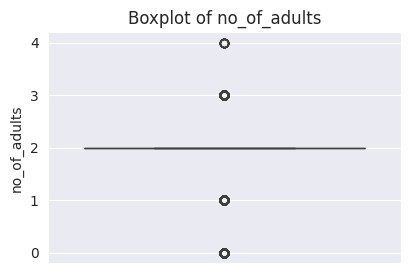

Skewness: -0.3332949302307013
Kurtosis: 0.8148219649541883


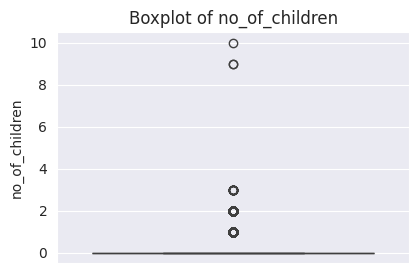

Skewness: 4.710349518506961
Kurtosis: 36.98185590119308


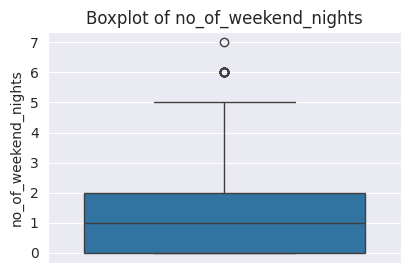

Skewness: 0.7376159576059308
Kurtosis: 0.2988575627243817


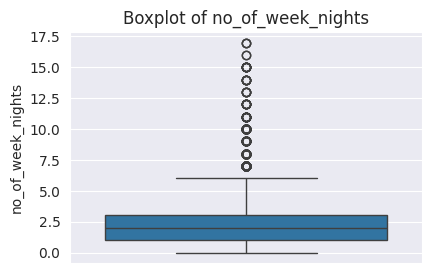

Skewness: 1.5993503651924639
Kurtosis: 7.798283949094243


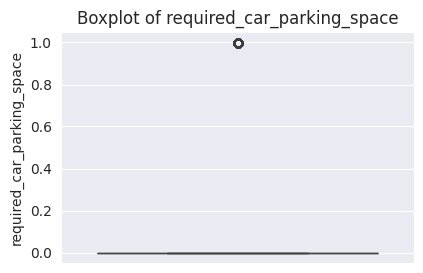

Skewness: 5.385426024544934
Kurtosis: 27.00435634824871


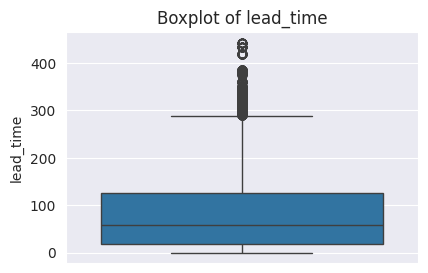

Skewness: 1.2924915330710838
Kurtosis: 1.1795940897790458


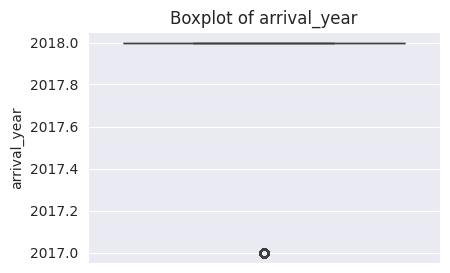

Skewness: -1.6696953495540467
Kurtosis: 0.787925999101224


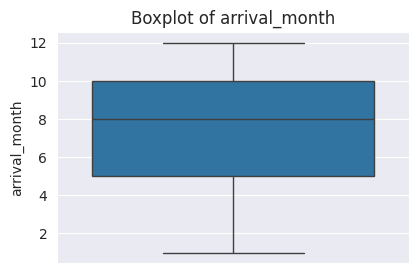

Skewness: -0.34822885187738667
Kurtosis: -0.9331889568857163


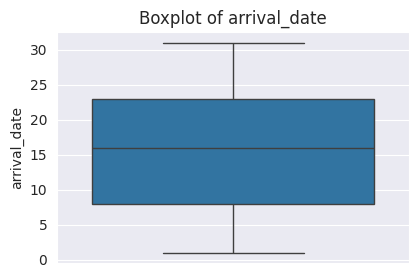

Skewness: 0.028808569139449704
Kurtosis: -1.157213970073237


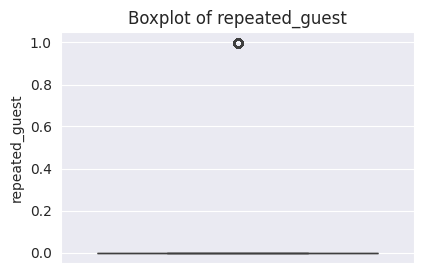

Skewness: 6.002888347093901
Kurtosis: 34.03654508879247


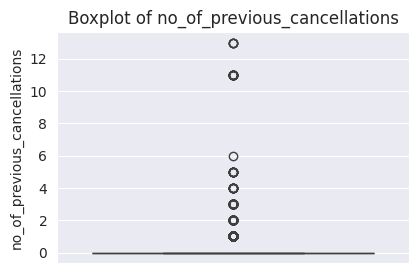

Skewness: 25.199875952075615
Kurtosis: 732.7356755507192


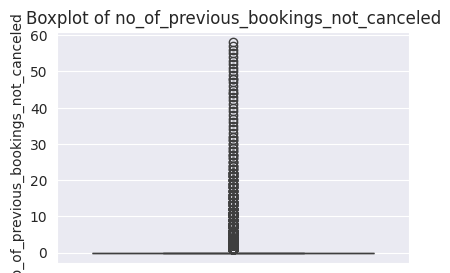

Skewness: 19.250190677395846
Kurtosis: 457.3800851716296


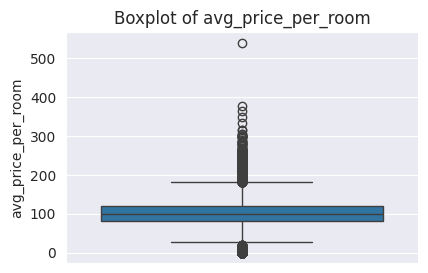

Skewness: 0.6654046613647858
Kurtosis: 3.1957401487168973


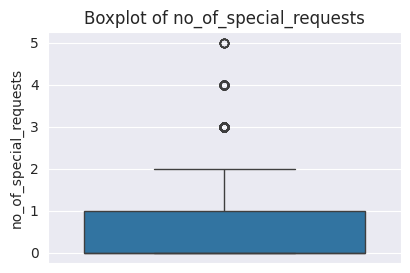

Skewness: 1.145080771394943
Kurtosis: 0.8814370153528488


In [7]:
def check_distribution_outliers(df, columns): #Mengecek apakah ada outlier atau tidak
    for col in columns:
        plt.figure(figsize=(10, 3))
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df[num_cols], num_cols)

Menginput missing value untuk tipe data kategorikal

In [8]:
#impute missing value untuk tipe data kategorikal
for col in cat_cols:
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [9]:
df['avg_price_per_room'].median()

99.45

In [10]:
df['required_car_parking_space'].median()


0.0

Impute Missing value dengan median

In [11]:
df.loc[df['avg_price_per_room'].isna(),'avg_price_per_room'] = df['avg_price_per_room'].dropna().median()
df.loc[df['required_car_parking_space'].isna(),'required_car_parking_space'] = df['required_car_parking_space'].dropna().median()


drop data bookingID karena tidak dibutuhkan untuk modelling

In [12]:
df.drop("Booking_ID", axis=1, inplace=True)

Encode target variable menggunakan LabelEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encode = ['booking_status']
label_encoders = {}

for col in label_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

input sisanya dengan OneHot karena tidak ada urutan khusus di unique valuenya

In [14]:
onehot_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # pakai sparse_output biar hasil array

# Fit dan transform
encoded_array = ohe.fit_transform(df[onehot_cols])
encoded_cols = ohe.get_feature_names_out(onehot_cols)

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df = pd.concat([df.drop(columns=onehot_cols), encoded_df], axis=1)


# Split data

In [15]:
#Split data
x = df.drop('booking_status', axis=1)
y = df['booking_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scalling

Scale menggunakan robustscaler untuk mengurangi data yang outlier karena nge scale data by IQR (interquartile) atau median

StandardScaler untuk kolom dengan distribusi normal.

In [16]:
#Standar Scale karena jangkauannya cukup normal
standard_scale_cols = [
    'no_of_adults',
    'no_of_weekend_nights',
    'arrival_month',
    'arrival_date',
    'avg_price_per_room'
]

#Menggunakan robust_scale karena jangkauannya cukup jauh
robust_scale_cols = [
    'no_of_children',
    'no_of_week_nights',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_special_requests'
]

from sklearn.preprocessing import StandardScaler, RobustScaler

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

#StandardScaler
df[standard_scale_cols] = standard_scaler.fit_transform(df[standard_scale_cols])

#RobustScaler
df[robust_scale_cols] = robust_scaler.fit_transform(df[robust_scale_cols])


# 1. Random Forest

In [17]:
rfc = RandomForestClassifier()

In [18]:
param_dist_rfc = {'n_estimators': sp_randint(50, 500),
                       'max_depth': sp_randint(1, 20)}

rand_search = RandomizedSearchCV(rfc,
                                 param_distributions = param_dist_rfc,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b94215474d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b942156c690>})

In [19]:
print('Best Hyperparameters:',  rand_search.best_params_)

Best Hyperparameters: {'max_depth': 18, 'n_estimators': 226}


In [20]:
depth = rand_search.best_params_['max_depth']
estimators = rand_search.best_params_['n_estimators']
rf_tuned = RandomForestClassifier(n_estimators=estimators, max_depth=depth)

In [26]:
rf_tuned.fit(x_train, y_train)
y_predict_rf_tuned = rf_tuned.predict(x_test)

print(classification_report(y_test, y_predict_rf_tuned))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2314
           1       0.91      0.94      0.93      4941

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.90      0.90      0.90      7255



# 2. XGBoost

In [22]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_predict_xgb = model.predict(x_test)

In [24]:
param_dist_xgb = {
    'n_estimators': sp_randint(50, 500),
    'max_depth': sp_randint(3, 20),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb = XGBClassifier()

rand_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter = 5,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

rand_search_xgb.fit(x_train, y_train)
print("Best parameters found: ", rand_search_xgb.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 182, 'subsample': 0.9}


In [27]:
best_model = rand_search_xgb.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2314
           1       0.92      0.94      0.93      4941

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

